# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

<AxesSubplot:>

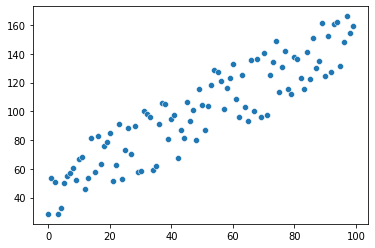

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 439.367682
Iteration 1 | Cost: 434.783817
Iteration 2 | Cost: 430.461421
Iteration 3 | Cost: 426.385321
Iteration 4 | Cost: 422.541224
Iteration 5 | Cost: 418.915666
Iteration 6 | Cost: 415.495965
Iteration 7 | Cost: 412.270176
Iteration 8 | Cost: 409.227045
Iteration 9 | Cost: 406.355974
Iteration 10 | Cost: 403.646977
Iteration 11 | Cost: 401.090651
Iteration 12 | Cost: 398.678135
Iteration 13 | Cost: 396.401084
Iteration 14 | Cost: 394.251639
Iteration 15 | Cost: 392.222395
Iteration 16 | Cost: 390.306376
Iteration 17 | Cost: 388.497013
Iteration 18 | Cost: 386.788118
Iteration 19 | Cost: 385.173861
Iteration 20 | Cost: 383.648751
Iteration 21 | Cost: 382.207615
Iteration 22 | Cost: 380.845582
Iteration 23 | Cost: 379.558061
Iteration 24 | Cost: 378.340729
Iteration 25 | Cost: 377.189515
Iteration 26 | Cost: 376.100583
Iteration 27 | Cost: 375.070319
Iteration 28 | Cost: 374.095319
Iteration 29 | Cost: 373.172378
Iteration 30 | Cost: 372.298476
Iteration 31 | Cos

Iteration 1456 | Cost: 268.742530
Iteration 1457 | Cost: 268.691777
Iteration 1458 | Cost: 268.641038
Iteration 1459 | Cost: 268.590316
Iteration 1460 | Cost: 268.539609
Iteration 1461 | Cost: 268.488917
Iteration 1462 | Cost: 268.438240
Iteration 1463 | Cost: 268.387579
Iteration 1464 | Cost: 268.336934
Iteration 1465 | Cost: 268.286304
Iteration 1466 | Cost: 268.235689
Iteration 1467 | Cost: 268.185090
Iteration 1468 | Cost: 268.134506
Iteration 1469 | Cost: 268.083938
Iteration 1470 | Cost: 268.033384
Iteration 1471 | Cost: 267.982847
Iteration 1472 | Cost: 267.932324
Iteration 1473 | Cost: 267.881818
Iteration 1474 | Cost: 267.831326
Iteration 1475 | Cost: 267.780850
Iteration 1476 | Cost: 267.730389
Iteration 1477 | Cost: 267.679944
Iteration 1478 | Cost: 267.629514
Iteration 1479 | Cost: 267.579099
Iteration 1480 | Cost: 267.528699
Iteration 1481 | Cost: 267.478315
Iteration 1482 | Cost: 267.427947
Iteration 1483 | Cost: 267.377593
Iteration 1484 | Cost: 267.327255
Iteration 1485

Iteration 2596 | Cost: 219.849941
Iteration 2597 | Cost: 219.814072
Iteration 2598 | Cost: 219.778213
Iteration 2599 | Cost: 219.742366
Iteration 2600 | Cost: 219.706530
Iteration 2601 | Cost: 219.670704
Iteration 2602 | Cost: 219.634889
Iteration 2603 | Cost: 219.599086
Iteration 2604 | Cost: 219.563293
Iteration 2605 | Cost: 219.527511
Iteration 2606 | Cost: 219.491740
Iteration 2607 | Cost: 219.455980
Iteration 2608 | Cost: 219.420231
Iteration 2609 | Cost: 219.384492
Iteration 2610 | Cost: 219.348765
Iteration 2611 | Cost: 219.313048
Iteration 2612 | Cost: 219.277342
Iteration 2613 | Cost: 219.241647
Iteration 2614 | Cost: 219.205963
Iteration 2615 | Cost: 219.170290
Iteration 2616 | Cost: 219.134628
Iteration 2617 | Cost: 219.098977
Iteration 2618 | Cost: 219.063336
Iteration 2619 | Cost: 219.027706
Iteration 2620 | Cost: 218.992087
Iteration 2621 | Cost: 218.956479
Iteration 2622 | Cost: 218.920882
Iteration 2623 | Cost: 218.885296
Iteration 2624 | Cost: 218.849720
Iteration 2625

Iteration 3955 | Cost: 179.924565
Iteration 3956 | Cost: 179.900851
Iteration 3957 | Cost: 179.877143
Iteration 3958 | Cost: 179.853443
Iteration 3959 | Cost: 179.829750
Iteration 3960 | Cost: 179.806064
Iteration 3961 | Cost: 179.782385
Iteration 3962 | Cost: 179.758714
Iteration 3963 | Cost: 179.735050
Iteration 3964 | Cost: 179.711393
Iteration 3965 | Cost: 179.687743
Iteration 3966 | Cost: 179.664100
Iteration 3967 | Cost: 179.640465
Iteration 3968 | Cost: 179.616837
Iteration 3969 | Cost: 179.593216
Iteration 3970 | Cost: 179.569602
Iteration 3971 | Cost: 179.545995
Iteration 3972 | Cost: 179.522396
Iteration 3973 | Cost: 179.498804
Iteration 3974 | Cost: 179.475218
Iteration 3975 | Cost: 179.451641
Iteration 3976 | Cost: 179.428070
Iteration 3977 | Cost: 179.404506
Iteration 3978 | Cost: 179.380950
Iteration 3979 | Cost: 179.357401
Iteration 3980 | Cost: 179.333859
Iteration 3981 | Cost: 179.310324
Iteration 3982 | Cost: 179.286796
Iteration 3983 | Cost: 179.263276
Iteration 3984

Iteration 5454 | Cost: 151.378908
Iteration 5455 | Cost: 151.363883
Iteration 5456 | Cost: 151.348863
Iteration 5457 | Cost: 151.333848
Iteration 5458 | Cost: 151.318837
Iteration 5459 | Cost: 151.303831
Iteration 5460 | Cost: 151.288829
Iteration 5461 | Cost: 151.273832
Iteration 5462 | Cost: 151.258839
Iteration 5463 | Cost: 151.243851
Iteration 5464 | Cost: 151.228868
Iteration 5465 | Cost: 151.213889
Iteration 5466 | Cost: 151.198915
Iteration 5467 | Cost: 151.183945
Iteration 5468 | Cost: 151.168980
Iteration 5469 | Cost: 151.154019
Iteration 5470 | Cost: 151.139063
Iteration 5471 | Cost: 151.124112
Iteration 5472 | Cost: 151.109165
Iteration 5473 | Cost: 151.094222
Iteration 5474 | Cost: 151.079284
Iteration 5475 | Cost: 151.064351
Iteration 5476 | Cost: 151.049422
Iteration 5477 | Cost: 151.034498
Iteration 5478 | Cost: 151.019578
Iteration 5479 | Cost: 151.004663
Iteration 5480 | Cost: 150.989753
Iteration 5481 | Cost: 150.974846
Iteration 5482 | Cost: 150.959945
Iteration 5483

Iteration 6954 | Cost: 133.284180
Iteration 6955 | Cost: 133.274664
Iteration 6956 | Cost: 133.265151
Iteration 6957 | Cost: 133.255641
Iteration 6958 | Cost: 133.246133
Iteration 6959 | Cost: 133.236629
Iteration 6960 | Cost: 133.227127
Iteration 6961 | Cost: 133.217629
Iteration 6962 | Cost: 133.208133
Iteration 6963 | Cost: 133.198640
Iteration 6964 | Cost: 133.189150
Iteration 6965 | Cost: 133.179663
Iteration 6966 | Cost: 133.170179
Iteration 6967 | Cost: 133.160698
Iteration 6968 | Cost: 133.151220
Iteration 6969 | Cost: 133.141744
Iteration 6970 | Cost: 133.132272
Iteration 6971 | Cost: 133.122802
Iteration 6972 | Cost: 133.113335
Iteration 6973 | Cost: 133.103871
Iteration 6974 | Cost: 133.094410
Iteration 6975 | Cost: 133.084952
Iteration 6976 | Cost: 133.075497
Iteration 6977 | Cost: 133.066044
Iteration 6978 | Cost: 133.056595
Iteration 6979 | Cost: 133.047148
Iteration 6980 | Cost: 133.037704
Iteration 6981 | Cost: 133.028263
Iteration 6982 | Cost: 133.018825
Iteration 6983

Iteration 8242 | Cost: 123.143759
Iteration 8243 | Cost: 123.137330
Iteration 8244 | Cost: 123.130903
Iteration 8245 | Cost: 123.124478
Iteration 8246 | Cost: 123.118055
Iteration 8247 | Cost: 123.111634
Iteration 8248 | Cost: 123.105214
Iteration 8249 | Cost: 123.098797
Iteration 8250 | Cost: 123.092382
Iteration 8251 | Cost: 123.085969
Iteration 8252 | Cost: 123.079557
Iteration 8253 | Cost: 123.073148
Iteration 8254 | Cost: 123.066741
Iteration 8255 | Cost: 123.060335
Iteration 8256 | Cost: 123.053932
Iteration 8257 | Cost: 123.047530
Iteration 8258 | Cost: 123.041131
Iteration 8259 | Cost: 123.034733
Iteration 8260 | Cost: 123.028337
Iteration 8261 | Cost: 123.021943
Iteration 8262 | Cost: 123.015552
Iteration 8263 | Cost: 123.009162
Iteration 8264 | Cost: 123.002774
Iteration 8265 | Cost: 122.996388
Iteration 8266 | Cost: 122.990004
Iteration 8267 | Cost: 122.983622
Iteration 8268 | Cost: 122.977242
Iteration 8269 | Cost: 122.970863
Iteration 8270 | Cost: 122.964487
Iteration 8271

Iteration 9453 | Cost: 116.631409
Iteration 9454 | Cost: 116.626962
Iteration 9455 | Cost: 116.622517
Iteration 9456 | Cost: 116.618074
Iteration 9457 | Cost: 116.613631
Iteration 9458 | Cost: 116.609190
Iteration 9459 | Cost: 116.604751
Iteration 9460 | Cost: 116.600312
Iteration 9461 | Cost: 116.595876
Iteration 9462 | Cost: 116.591440
Iteration 9463 | Cost: 116.587006
Iteration 9464 | Cost: 116.582573
Iteration 9465 | Cost: 116.578142
Iteration 9466 | Cost: 116.573711
Iteration 9467 | Cost: 116.569283
Iteration 9468 | Cost: 116.564855
Iteration 9469 | Cost: 116.560429
Iteration 9470 | Cost: 116.556004
Iteration 9471 | Cost: 116.551581
Iteration 9472 | Cost: 116.547159
Iteration 9473 | Cost: 116.542738
Iteration 9474 | Cost: 116.538319
Iteration 9475 | Cost: 116.533901
Iteration 9476 | Cost: 116.529484
Iteration 9477 | Cost: 116.525069
Iteration 9478 | Cost: 116.520655
Iteration 9479 | Cost: 116.516242
Iteration 9480 | Cost: 116.511831
Iteration 9481 | Cost: 116.507421
Iteration 9482

Iteration 10484 | Cost: 112.696416
Iteration 10485 | Cost: 112.693167
Iteration 10486 | Cost: 112.689920
Iteration 10487 | Cost: 112.686673
Iteration 10488 | Cost: 112.683428
Iteration 10489 | Cost: 112.680184
Iteration 10490 | Cost: 112.676940
Iteration 10491 | Cost: 112.673698
Iteration 10492 | Cost: 112.670456
Iteration 10493 | Cost: 112.667216
Iteration 10494 | Cost: 112.663976
Iteration 10495 | Cost: 112.660738
Iteration 10496 | Cost: 112.657500
Iteration 10497 | Cost: 112.654263
Iteration 10498 | Cost: 112.651028
Iteration 10499 | Cost: 112.647793
Iteration 10500 | Cost: 112.644560
Iteration 10501 | Cost: 112.641327
Iteration 10502 | Cost: 112.638095
Iteration 10503 | Cost: 112.634865
Iteration 10504 | Cost: 112.631635
Iteration 10505 | Cost: 112.628406
Iteration 10506 | Cost: 112.625179
Iteration 10507 | Cost: 112.621952
Iteration 10508 | Cost: 112.618726
Iteration 10509 | Cost: 112.615501
Iteration 10510 | Cost: 112.612278
Iteration 10511 | Cost: 112.609055
Iteration 10512 | Co

Iteration 12045 | Cost: 108.659839
Iteration 12046 | Cost: 108.657819
Iteration 12047 | Cost: 108.655800
Iteration 12048 | Cost: 108.653782
Iteration 12049 | Cost: 108.651764
Iteration 12050 | Cost: 108.649747
Iteration 12051 | Cost: 108.647731
Iteration 12052 | Cost: 108.645715
Iteration 12053 | Cost: 108.643700
Iteration 12054 | Cost: 108.641685
Iteration 12055 | Cost: 108.639671
Iteration 12056 | Cost: 108.637658
Iteration 12057 | Cost: 108.635645
Iteration 12058 | Cost: 108.633633
Iteration 12059 | Cost: 108.631621
Iteration 12060 | Cost: 108.629610
Iteration 12061 | Cost: 108.627600
Iteration 12062 | Cost: 108.625590
Iteration 12063 | Cost: 108.623581
Iteration 12064 | Cost: 108.621572
Iteration 12065 | Cost: 108.619564
Iteration 12066 | Cost: 108.617557
Iteration 12067 | Cost: 108.615550
Iteration 12068 | Cost: 108.613544
Iteration 12069 | Cost: 108.611539
Iteration 12070 | Cost: 108.609534
Iteration 12071 | Cost: 108.607530
Iteration 12072 | Cost: 108.605526
Iteration 12073 | Co

Iteration 13130 | Cost: 106.793505
Iteration 13131 | Cost: 106.792053
Iteration 13132 | Cost: 106.790602
Iteration 13133 | Cost: 106.789152
Iteration 13134 | Cost: 106.787702
Iteration 13135 | Cost: 106.786252
Iteration 13136 | Cost: 106.784803
Iteration 13137 | Cost: 106.783354
Iteration 13138 | Cost: 106.781906
Iteration 13139 | Cost: 106.780458
Iteration 13140 | Cost: 106.779011
Iteration 13141 | Cost: 106.777564
Iteration 13142 | Cost: 106.776117
Iteration 13143 | Cost: 106.774671
Iteration 13144 | Cost: 106.773225
Iteration 13145 | Cost: 106.771780
Iteration 13146 | Cost: 106.770335
Iteration 13147 | Cost: 106.768891
Iteration 13148 | Cost: 106.767447
Iteration 13149 | Cost: 106.766004
Iteration 13150 | Cost: 106.764561
Iteration 13151 | Cost: 106.763118
Iteration 13152 | Cost: 106.761676
Iteration 13153 | Cost: 106.760234
Iteration 13154 | Cost: 106.758793
Iteration 13155 | Cost: 106.757352
Iteration 13156 | Cost: 106.755912
Iteration 13157 | Cost: 106.754472
Iteration 13158 | Co

Iteration 14541 | Cost: 105.128474
Iteration 14542 | Cost: 105.127529
Iteration 14543 | Cost: 105.126585
Iteration 14544 | Cost: 105.125641
Iteration 14545 | Cost: 105.124698
Iteration 14546 | Cost: 105.123754
Iteration 14547 | Cost: 105.122811
Iteration 14548 | Cost: 105.121868
Iteration 14549 | Cost: 105.120926
Iteration 14550 | Cost: 105.119984
Iteration 14551 | Cost: 105.119042
Iteration 14552 | Cost: 105.118100
Iteration 14553 | Cost: 105.117159
Iteration 14554 | Cost: 105.116218
Iteration 14555 | Cost: 105.115277
Iteration 14556 | Cost: 105.114336
Iteration 14557 | Cost: 105.113396
Iteration 14558 | Cost: 105.112456
Iteration 14559 | Cost: 105.111517
Iteration 14560 | Cost: 105.110577
Iteration 14561 | Cost: 105.109638
Iteration 14562 | Cost: 105.108699
Iteration 14563 | Cost: 105.107761
Iteration 14564 | Cost: 105.106823
Iteration 14565 | Cost: 105.105885
Iteration 14566 | Cost: 105.104947
Iteration 14567 | Cost: 105.104010
Iteration 14568 | Cost: 105.103073
Iteration 14569 | Co

Iteration 15730 | Cost: 104.186131
Iteration 15731 | Cost: 104.185473
Iteration 15732 | Cost: 104.184816
Iteration 15733 | Cost: 104.184158
Iteration 15734 | Cost: 104.183501
Iteration 15735 | Cost: 104.182845
Iteration 15736 | Cost: 104.182188
Iteration 15737 | Cost: 104.181531
Iteration 15738 | Cost: 104.180875
Iteration 15739 | Cost: 104.180219
Iteration 15740 | Cost: 104.179563
Iteration 15741 | Cost: 104.178908
Iteration 15742 | Cost: 104.178252
Iteration 15743 | Cost: 104.177597
Iteration 15744 | Cost: 104.176942
Iteration 15745 | Cost: 104.176287
Iteration 15746 | Cost: 104.175633
Iteration 15747 | Cost: 104.174978
Iteration 15748 | Cost: 104.174324
Iteration 15749 | Cost: 104.173670
Iteration 15750 | Cost: 104.173016
Iteration 15751 | Cost: 104.172362
Iteration 15752 | Cost: 104.171709
Iteration 15753 | Cost: 104.171056
Iteration 15754 | Cost: 104.170403
Iteration 15755 | Cost: 104.169750
Iteration 15756 | Cost: 104.169097
Iteration 15757 | Cost: 104.168445
Iteration 15758 | Co

Iteration 17450 | Cost: 103.305475
Iteration 17451 | Cost: 103.305086
Iteration 17452 | Cost: 103.304696
Iteration 17453 | Cost: 103.304307
Iteration 17454 | Cost: 103.303918
Iteration 17455 | Cost: 103.303529
Iteration 17456 | Cost: 103.303140
Iteration 17457 | Cost: 103.302751
Iteration 17458 | Cost: 103.302362
Iteration 17459 | Cost: 103.301974
Iteration 17460 | Cost: 103.301585
Iteration 17461 | Cost: 103.301197
Iteration 17462 | Cost: 103.300809
Iteration 17463 | Cost: 103.300420
Iteration 17464 | Cost: 103.300032
Iteration 17465 | Cost: 103.299645
Iteration 17466 | Cost: 103.299257
Iteration 17467 | Cost: 103.298869
Iteration 17468 | Cost: 103.298482
Iteration 17469 | Cost: 103.298094
Iteration 17470 | Cost: 103.297707
Iteration 17471 | Cost: 103.297320
Iteration 17472 | Cost: 103.296933
Iteration 17473 | Cost: 103.296546
Iteration 17474 | Cost: 103.296159
Iteration 17475 | Cost: 103.295772
Iteration 17476 | Cost: 103.295386
Iteration 17477 | Cost: 103.294999
Iteration 17478 | Co

Iteration 18949 | Cost: 102.836594
Iteration 18950 | Cost: 102.836347
Iteration 18951 | Cost: 102.836101
Iteration 18952 | Cost: 102.835854
Iteration 18953 | Cost: 102.835608
Iteration 18954 | Cost: 102.835361
Iteration 18955 | Cost: 102.835115
Iteration 18956 | Cost: 102.834868
Iteration 18957 | Cost: 102.834622
Iteration 18958 | Cost: 102.834376
Iteration 18959 | Cost: 102.834130
Iteration 18960 | Cost: 102.833884
Iteration 18961 | Cost: 102.833638
Iteration 18962 | Cost: 102.833392
Iteration 18963 | Cost: 102.833146
Iteration 18964 | Cost: 102.832900
Iteration 18965 | Cost: 102.832655
Iteration 18966 | Cost: 102.832409
Iteration 18967 | Cost: 102.832164
Iteration 18968 | Cost: 102.831918
Iteration 18969 | Cost: 102.831673
Iteration 18970 | Cost: 102.831427
Iteration 18971 | Cost: 102.831182
Iteration 18972 | Cost: 102.830937
Iteration 18973 | Cost: 102.830692
Iteration 18974 | Cost: 102.830447
Iteration 18975 | Cost: 102.830202
Iteration 18976 | Cost: 102.829957
Iteration 18977 | Co

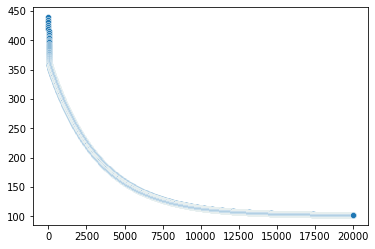

In [6]:
numEpochs= 20000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise